## Figuring Out

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from pathlib import Path

In [176]:
import lxml.etree as ET

with open("annot/Childrens in the classrooms_image_0.xml", 'r') as f:
    xml_data = f.read()

label = ET.fromstring(xml_data)

# Print the label object as a string
# print(ET.tostring(label, pretty_print=True).decode())

# Access all the bndbox values
for object_element in label.findall("object"):
    bndbox_element = object_element.find("bndbox")
    xmin = int(bndbox_element.find("xmin").text)
    ymin = int(bndbox_element.find("ymin").text)
    xmax = int(bndbox_element.find("xmax").text)
    ymax = int(bndbox_element.find("ymax").text)
    print(f"Bounding Box: xmin={xmin}, ymin={ymin}, xmax={xmax}, ymax={ymax}")


Bounding Box: xmin=101, ymin=95, xmax=143, ymax=166
Bounding Box: xmin=188, ymin=89, xmax=226, ymax=167
Bounding Box: xmin=172, ymin=60, xmax=196, ymax=103
Bounding Box: xmin=106, ymin=62, xmax=142, ymax=104
Bounding Box: xmin=52, ymin=63, xmax=78, ymax=105
Bounding Box: xmin=24, ymin=87, xmax=61, ymax=168


Bounding Box: xmin=82, ymin=4, xmax=173, ymax=183


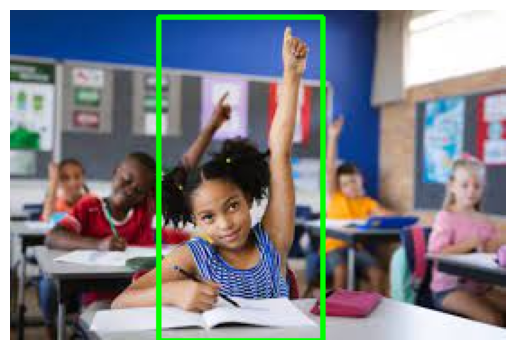

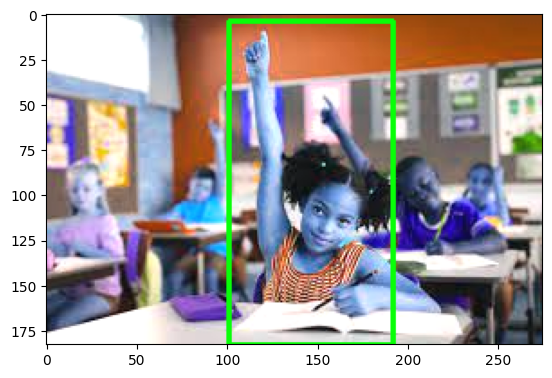

In [95]:
import albumentations as alb
augmentor = alb.Compose([
    # alb.RandomCrop(width=100, height=100),
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)],
    bbox_params=alb.BboxParams(format="pascal_voc", label_fields=['class_label']))

import lxml.etree as ET

with open("annot/Childrens in the classrooms_image_2.xml", 'r') as f:
    xml_data = f.read()

label = ET.fromstring(xml_data)

# Access all the bndbox values
for object_element in label.findall("object"):
    bndbox_element = object_element.find("bndbox")
    xmin = int(bndbox_element.find("xmin").text)
    ymin = int(bndbox_element.find("ymin").text)
    xmax = int(bndbox_element.find("xmax").text)
    ymax = int(bndbox_element.find("ymax").text)
    print(f"Bounding Box: xmin={xmin}, ymin={ymin}, xmax={xmax}, ymax={ymax}")

import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("images/Childrens in the classrooms_image_2.jpg")

# Define the bounding box coordinates
xmin = 82
ymin = 4
xmax = 173
ymax = 183

# Draw the bounding box on the image
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Convert BGR image to RGB for visualization
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image with bounding box
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

coords = [xmin, ymin, xmax, ymax]
coords = list(np.divide(coords,[183,275,183,275]))

augmented = augmentor(image=img,bboxes =[coords], class_label=['person'])
cv2.rectangle(augmented['image'],
                tuple(np.multiply(augmented["bboxes"][0][:2],[183,275]).astype(int)),
                tuple(np.multiply(augmented["bboxes"][0][2:],[183,275]).astype(int)),
                (255,0,0),2)
plt.imshow(augmented['image'])

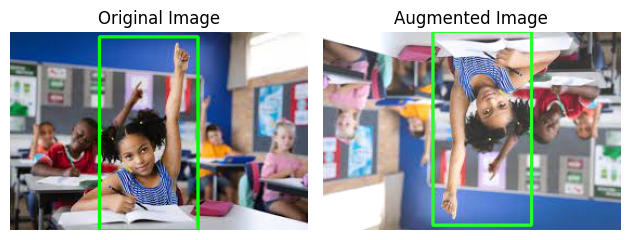

In [102]:
import cv2
import numpy as np
import albumentations as alb
import matplotlib.pyplot as plt
import lxml.etree as ET

augmentor = alb.Compose([
    # alb.RandomCrop(width=100, height=100),
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)],
    bbox_params=alb.BboxParams(format="pascal_voc", label_fields=['class_label']))

# Read XML data
with open("annot/Childrens in the classrooms_image_2.xml", 'r') as f:
    xml_data = f.read()

# Parse XML
label = ET.fromstring(xml_data)

# Get image size
image_size = label.find("size")
image_width = int(image_size.find("width").text)
image_height = int(image_size.find("height").text)

# Access all the bndbox values
bboxes = []
for object_element in label.findall("object"):
    bndbox_element = object_element.find("bndbox")
    xmin = int(bndbox_element.find("xmin").text)
    ymin = int(bndbox_element.find("ymin").text)
    xmax = int(bndbox_element.find("xmax").text)
    ymax = int(bndbox_element.find("ymax").text)
    coords = [xmin, ymin, xmax, ymax]
    bboxes.append(coords)

# Load the image
img = cv2.imread("images/Childrens in the classrooms_image_2.jpg")

# Draw the original bounding boxes on the image
for bbox in bboxes:
    xmin, ymin, xmax, ymax = bbox
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Convert BGR image to RGB for visualization
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the original image with bounding boxes
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Original Image')

class_labels = ['person'] * len(bboxes)
# Apply augmentation
augmented = augmentor(image=img, bboxes=bboxes, class_label=class_labels)
augmented_image = augmented['image']
augmented_bboxes = augmented['bboxes']

# Draw the augmented bounding boxes on the image
for bbox in augmented_bboxes:
    xmin, ymin, xmax, ymax = bbox
    xmin = int(xmin * augmented_image.shape[1])
    ymin = int(ymin * augmented_image.shape[0])
    xmax = int(xmax * augmented_image.shape[1])
    ymax = int(ymax * augmented_image.shape[0])
    cv2.rectangle(augmented_image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

# Display the augmented image with bounding boxes
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Augmented Image')

plt.tight_layout()
plt.show()

## Actually working Augmentation

In [199]:
def preprocessing_image(I_N,H_F,R_B_C,R_G,RGB_S,V_F,C_J,G_N,S_S_R,image_folder):
    augmentor = alb.Compose([
        alb.HorizontalFlip(p=H_F),
        alb.RandomBrightnessContrast(p=R_B_C),
        alb.RandomGamma(p=R_G),
        alb.ShiftScaleRotate(scale_limit=S_S_R, p=0.2),
        alb.RGBShift(p=RGB_S),
        alb.GaussNoise(p=G_N),
        alb.ColorJitter(p=C_J),
        alb.VerticalFlip(p=V_F)],
        alb.BboxParams(format="pascal_voc", label_fields=['class_label']))
    # Process each image
    image_files = os.listdir(image_folder)
    for image_file in image_files:
        # Read XML data
        xml_file = os.path.splitext(image_file)[0] + ".xml"
        xml_path = os.path.join("annot", xml_file)
        if not os.path.exists(xml_path):
            # Load the image
            image_path = os.path.join(image_folder, image_file)
            img = cv2.imread(image_path)

            # Get image width and height
            image_height, image_width, _ = img.shape

            # Create a dummy annotation
            root = ET.Element("annotation")
            size_element = ET.SubElement(root, "size")
            width_element = ET.SubElement(size_element, "width")
            width_element.text = str(image_width)
            height_element = ET.SubElement(size_element, "height")
            height_element.text = str(image_height)
            depth_element = ET.SubElement(size_element, "depth")
            depth_element.text = "3"
            
            object_element = ET.SubElement(root, "object")
            name_element = ET.SubElement(object_element, "name")
            name_element.text = "0"
            pose_element = ET.SubElement(object_element, "pose")
            pose_element.text = "Unspecified"
            truncated_element = ET.SubElement(object_element, "truncated")
            truncated_element.text = "0"
            difficult_element = ET.SubElement(object_element, "difficult")
            difficult_element.text = "0"
            bndbox_element = ET.SubElement(object_element, "bndbox")
            xmin_element = ET.SubElement(bndbox_element, "xmin")
            xmin_element.text = "0"
            ymin_element = ET.SubElement(bndbox_element, "ymin")
            ymin_element.text = "0"
            xmax_element = ET.SubElement(bndbox_element, "xmax")
            xmax_element.text = "0"
            ymax_element = ET.SubElement(bndbox_element, "ymax")
            ymax_element.text = "0"
            Created_Custom = True
            # Save the dummy annotation XML
            output_xml_path = os.path.join("annot", xml_file)
            with open(output_xml_path, 'wb') as f:
                f.write(ET.tostring(root))    

        with open(xml_path, 'r') as f:
            xml_data = f.read()

        # Parse XML
        label = ET.fromstring(xml_data)

        # Get image size
        image_size = label.find("size")
        image_width = int(image_size.find("width").text)
        image_height = int(image_size.find("height").text)

        # Access all the bndbox values
        bboxes = []
        for object_element in label.findall("object"):
            bndbox_element = object_element.find("bndbox")
            xmin = int(bndbox_element.find("xmin").text)
            ymin = int(bndbox_element.find("ymin").text)
            xmax = int(bndbox_element.find("xmax").text)
            ymax = int(bndbox_element.find("ymax").text)
            coords = [xmin, ymin, xmax, ymax]
            bboxes.append(coords)

        # Load the image
        image_path = os.path.join(image_folder, image_file)
        img = cv2.imread(image_path)

        class_labels = ['person'] * len(bboxes)
        
        # Apply augmentation and save augmented images with annotations
        for i in range(I_N):
            if xmin == 0:
                augmentor = alb.Compose([
                    # alb.RandomCrop(width=100, height=100),
                    alb.HorizontalFlip(p=0.5),
                    alb.RandomBrightnessContrast(p=0.2),
                    alb.RandomGamma(p=0.2),
                    alb.RGBShift(p=0.2),
                    alb.VerticalFlip(p=0.5)])
                augmented = augmentor(image=img)
                augmented_image = augmented['image']
            else:
                augmented = augmentor(image=img, bboxes=bboxes, class_label=class_labels)
                augmented_image = augmented['image']
                augmented_bboxes = augmented['bboxes']


            # Save augmented image
            output_image_file = os.path.splitext(image_file)[0] + f"_augmented_{i+1}.jpg"
            output_image_path = os.path.join(output_folder, image_folder, output_image_file)
            cv2.imwrite(output_image_path, augmented_image)

            if xmin != 0:
                # Update annotation XML with augmented bounding boxes
                for idx, bbox in enumerate(augmented_bboxes):
                    xmin, ymin, xmax, ymax = bbox
                    xmin /= augmented_image.shape[1]
                    ymin /= augmented_image.shape[0]
                    xmax /= augmented_image.shape[1]
                    ymax /= augmented_image.shape[0]

                    # Update original XML with augmented bounding boxes
                    bndbox_element = label.findall("object")[idx].find("bndbox")
                    bndbox_element.find("xmin").text = str(int(xmin * image_width))
                    bndbox_element.find("ymin").text = str(int(ymin * image_height))
                    bndbox_element.find("xmax").text = str(int(xmax * image_width))
                    bndbox_element.find("ymax").text = str(int(ymax * image_height))

                # Save augmented annotation XML
                output_xml_file = os.path.splitext(image_file)[0] +f"_augmented_{i+1}"+ ".xml"
                output_xml_path = os.path.join(output_folder, annotation_folder, output_xml_file)
                with open(output_xml_path, 'wb') as f:
                    f.write(ET.tostring(label))
            else:
                # write the answer
                name, format = xml_file.split(".")
                source_file = "annot/"+xml_file
                destination_folder = "output/annotations/"+name+f"_augmented_{i+1}"+ ".xml"

                # Copy the file to the destination folder
                shutil.copy(source_file, destination_folder)

              

In [205]:
import os
import cv2
import numpy as np
import albumentations as alb
import matplotlib.pyplot as plt
import lxml.etree as ET
import shutil

image_folder = "images"
annotation_folder = "annotations"
output_folder = "output"

# Parameters to users
I_N = 3
H_F = 0.5
R_B_C = 0.2
R_G = 0.2
RGB_S = 0.2
V_F = 0.5
R_Z = 0.5
G_N = 0.5
C_J = 0.5
R = 360
D = "images"
S_S_R = 0.2
# Create output folders if they don't exist
os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, image_folder), exist_ok=True)
os.makedirs(os.path.join(output_folder, annotation_folder), exist_ok=True)

preprocessing_image(I_N,H_F,R_B_C,R_G,RGB_S,V_F,C_J,G_N,S_S_R,D)

# Drawing

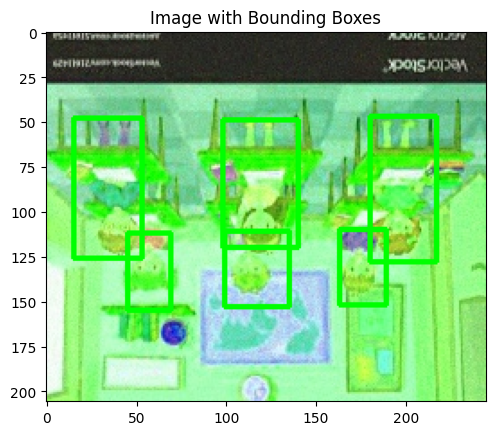

In [4]:
import os
import cv2
import numpy as np
import lxml.etree as ET
import matplotlib.pyplot as plt
n = 0
a_n = 10
# Read the XML data
xml_file = f"output/annotations/Childrens in the classrooms_image_{n}_augmented_{a_n}.xml"
with open(xml_file, 'r') as f:
    xml_data = f.read()

# Parse XML
label = ET.fromstring(xml_data)

# Get image path and size from XML
image_path = f"output/images/Childrens in the classrooms_image_{n}_augmented_{a_n}.jpg"
image_width = int(label.find("size/width").text)
image_height = int(label.find("size/height").text)

# Load the image
img = plt.imread(image_path)

# Draw bounding boxes on the image
for object_element in label.findall("object"):
    xmin = int(object_element.find("bndbox/xmin").text)
    ymin = int(object_element.find("bndbox/ymin").text)
    xmax = int(object_element.find("bndbox/xmax").text)
    ymax = int(object_element.find("bndbox/ymax").text)

    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Display the image with bounding boxes
plt.imshow(img)
plt.title("Image with Bounding Boxes")
plt.show()

## Others

In [1]:
import json

In [7]:
from pathlib import Path
import os

In [38]:
path = Path("d/dum")
os.makedirs(path, exist_ok=True)
# Open the file in write mode and create it if it doesn't exist
with open(path, 'w') as file:
    file.write('This is a new text file.\n')
    file.write('It contains some sample text.\n')
    file.write('You can add more content as needed.\n')

PermissionError: [Errno 13] Permission denied: 'd\\dum'

In [33]:
annotation_file = "B:\labels"
with open(annotation_file,"r") as f:
    annotations = json.load(f)
annotations

PermissionError: [Errno 13] Permission denied: 'B:\\labels'

In [245]:
import json
import os
import cv2
import shutil
import xml.etree.ElementTree as ET
import albumentations as alb

def preprocessing_image(I_N, H_F, R_B_C, R_G, RGB_S, V_F, C_J, G_N, S_S_R, image_folder):
    augmentor = alb.Compose([
        alb.HorizontalFlip(p=H_F),
        alb.RandomBrightnessContrast(p=R_B_C),
        alb.RandomGamma(p=R_G),
        alb.ShiftScaleRotate(scale_limit=S_S_R, p=0.2),
        alb.RGBShift(p=RGB_S),
        alb.GaussNoise(p=G_N),
        alb.ColorJitter(p=C_J),
        alb.VerticalFlip(p=V_F)],
        alb.BboxParams(format="pascal_voc", label_fields=['class_label']))
    annotation_file = os.path.join("annot","\\")
    with open(annotation_file, 'r') as f:
        annotations = json.load(f)
    
    for annotation in annotations:
        image_file = annotation['image']
        verified = annotation['verified']
        image_annotations = annotation['annotations']
        
        # Read image
        image_path = os.path.join(image_folder, image_file)
        img = cv2.imread(image_path)

        # Get image width and height
        image_height, image_width, _ = img.shape

        # Create a dummy annotation if no annotations exist
        if len(image_annotations) == 0:
            root = ET.Element("annotation")
            size_element = ET.SubElement(root, "size")
            width_element = ET.SubElement(size_element, "width")
            width_element.text = str(image_width)
            height_element = ET.SubElement(size_element, "height")
            height_element.text = str(image_height)
            depth_element = ET.SubElement(size_element, "depth")
            depth_element.text = "3"
            
            object_element = ET.SubElement(root, "object")
            name_element = ET.SubElement(object_element, "name")
            name_element.text = "0"
            pose_element = ET.SubElement(object_element, "pose")
            pose_element.text = "Unspecified"
            truncated_element = ET.SubElement(object_element, "truncated")
            truncated_element.text = "0"
            difficult_element = ET.SubElement(object_element, "difficult")
            difficult_element.text = "0"
            bndbox_element = ET.SubElement(object_element, "bndbox")
            xmin_element = ET.SubElement(bndbox_element, "xmin")
            xmin_element.text = "0"
            ymin_element = ET.SubElement(bndbox_element, "ymin")
            ymin_element.text = "0"
            xmax_element = ET.SubElement(bndbox_element, "xmax")
            xmax_element.text = "0"
            ymax_element = ET.SubElement(bndbox_element, "ymax")
            ymax_element.text = "0"
            
            # Save the dummy annotation XML
            xml_file = os.path.splitext(image_file)[0] + ".xml"
            output_xml_path = os.path.join("annot", xml_file)
            with open(output_xml_path, 'wb') as f:
                f.write(ET.tostring(root))
            
            continue
        
        # Process each annotation
        for i, image_annotation in enumerate(image_annotations):
            label = image_annotation['label']
            coordinates = image_annotation['coordinates']
            x = coordinates['x']
            y = coordinates['y']
            width = coordinates['width']
            height = coordinates['height']
            
            # Create bounding box coordinates
            xmin = int(x)
            ymin = int(y)
            xmax = int(x + width)
            ymax = int(y + height)
            
            # Apply augmentation and save augmented images with annotations
            for j in range(I_N):
                augmented = augmentor(image=img, bboxes=[[xmin, ymin, xmax, ymax]], class_label=[label])
                augmented_image = augmented['image']
                augmented_bboxes = augmented['bboxes']

                # Save augmented image
                output_image_file = os.path.splitext(image_file)[0] + f"_augmented_{i+1}_{j+1}.jpg"
                output_image_path = os.path.join(output_folder, image_folder, output_image_file)
                cv2.imwrite(output_image_path, augmented_image)

                # Update annotation XML with augmented bounding boxes
                for idx, bbox in enumerate(augmented_bboxes):
                    xmin, ymin, xmax, ymax = bbox
                    xmin /= augmented_image.shape[1]
                    ymin /= augmented_image.shape[0]
                    xmax /= augmented_image.shape[1]
                    ymax /= augmented_image.shape[0]

                    # Update original XML with augmented bounding boxes
                    bndbox_element = label.findall("object")[idx].find("bndbox")
                    bndbox_element.find("xmin").text = str(int(xmin * image_width))
                    bndbox_element.find("ymin").text = str(int(ymin * image_height))
                    bndbox_element.find("xmax").text = str(int(xmax * image_width))
                    bndbox_element.find("ymax").text = str(int(ymax * image_height))

                # Save augmented annotation XML
                output_xml_file = os.path.splitext(image_file)[0] + f"_augmented_{i+1}_{j+1}.xml"
                output_xml_path = os.path.join(output_folder, annotation_folder, output_xml_file)
                with open(output_xml_path, 'wb') as f:
                    f.write(ET.tostring(label))

                if not verified:
                    # Copy the file to the destination folder
                    name, _ = xml_file.split(".")
                    source_file = "annot/" + xml_file
                    destination_folder = "output/annotations/" + name + f"_augmented_{i+1}_{j+1}" + ".xml"
                    shutil.copy(source_file, destination_folder)

In [246]:
import os
import cv2
import numpy as np
import albumentations as alb
import matplotlib.pyplot as plt
import lxml.etree as ET
import shutil

image_folder = "images"
annotation_folder = "annotations"
output_folder = "output"

# Parameters to users
I_N = 3
H_F = 0.5
R_B_C = 0.2
R_G = 0.2
RGB_S = 0.2
V_F = 0.5
R_Z = 0.5
G_N = 0.5
C_J = 0.5
R = 360
D = "images"
S_S_R = 0.2
# Create output folders if they don't exist
os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, image_folder), exist_ok=True)
os.makedirs(os.path.join(output_folder, annotation_folder), exist_ok=True)

preprocessing_image(I_N,H_F,R_B_C,R_G,RGB_S,V_F,C_J,G_N,S_S_R,D)

FileNotFoundError: [Errno 2] No such file or directory: '\\'

In [230]:
# for json 

import os
import cv2
import numpy as np
import albumentations as alb
import shutil
import json

augmentor = alb.Compose([
    # alb.RandomCrop(width=100, height=100),
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)],
    bbox_params=alb.BboxParams(format="coco", label_fields=['category_id']))

image_folder = "images"
annotation_folder = "annotations"
output_folder = "output"

# Create output folders if they don't exist
os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, image_folder), exist_ok=True)
os.makedirs(os.path.join(output_folder, annotation_folder), exist_ok=True)

# Process each image
for image_file in os.listdir(image_folder):
    # Read JSON data
    json_file = os.path.splitext(image_file)[0] + ".json"
    json_path = os.path.join(annotation_folder, json_file)
    if not os.path.exists(json_path):
        # Load the image
        image_path = os.path.join(image_folder, image_file)
        img = cv2.imread(image_path)

        # Get image width and height
        image_height, image_width, _ = img.shape

        # Create a dummy annotation
        annotation = {
            "image_id": 0,
            "file_name": image_file,
            "height": image_height,
            "width": image_width,
            "annotations": [
                {
                    "id": 0,
                    "category_id": 0,
                    "bbox": [0, 0, 0, 0],
                    "segmentation": [],
                    "area": 0,
                    "iscrowd": 0
                }
            ]
        }
        Created_Custom = True

        # Save the dummy annotation JSON
        output_json_path = os.path.join(annotation_folder, json_file)
        with open(output_json_path, 'w') as f:
            json.dump(annotation, f)
    
    with open(json_path, 'r') as f:
        json_data = json.load(f)

    # Access all the bounding box coordinates
    bboxes = []
    for annotation in json_data["annotations"]:
        bbox = annotation["bbox"]
        xmin, ymin, width, height = bbox
        xmax = xmin + width
        ymax = ymin + height
        coords = [xmin, ymin, xmax, ymax]
        bboxes.append(coords)

    # Load the image
    image_path = os.path.join(image_folder, image_file)
    img = cv2.imread(image_path)

    class_ids = [0] * len(bboxes)
    
    # Apply augmentation and save augmented images with annotations
    for i in range(5):
        if xmin == 0:
            augmentor = alb.Compose([
                # alb.RandomCrop(width=100, height=100),
                alb.HorizontalFlip(p=0.5),
                alb.RandomBrightnessContrast(p=0.2),
                alb.RandomGamma(p=0.2),
                alb.RGBShift(p=0.2),
                alb.VerticalFlip(p=0.5)])
            augmented = augmentor(image=img)
            augmented_image = augmented['image']
        else:
            augmented = augmentor(image=img, bboxes=bboxes, category_id=class_ids)
            augmented_image = augmented['image']
            augmented_bboxes = augmented['bboxes']

        # Save augmented image
        output_image_file = os.path.splitext(image_file)[0] + f"_augmented_{i+1}.jpg"
        output_image_path = os.path.join(output_folder, image_folder, output_image_file)
        cv2.imwrite(output_image_path, augmented_image)

        if xmin != 0:
            # Update annotation JSON with augmented bounding boxes
            for idx, bbox in enumerate(augmented_bboxes):
                xmin, ymin, xmax, ymax = bbox
                width = xmax - xmin
                height = ymax - ymin

                # Update original JSON with augmented bounding boxes
                json_data["annotations"][idx]["bbox"] = [xmin, ymin, width, height]

            # Save augmented annotation JSON
            output_json_file = os.path.splitext(image_file)[0] +f"_augmented_{i+1}"+ ".json"
            output_json_path = os.path.join(output_folder, annotation_folder, output_json_file)
            with open(output_json_path, 'w') as f:
                json.dump(json_data, f)
        else:
            # Copy the file to the destination folder
            name, _ = json_file.split(".")
            source_file = os.path.join(annotation_folder, json_file)
            destination_folder = os.path.join(output_folder, annotation_folder, name + f"_augmented_{i+1}" + ".json")
            shutil.copy(source_file, destination_folder)


FileNotFoundError: [Errno 2] No such file or directory: 'annotations\\Childrens in the classrooms_image_0.json'

In [ ]:
# for csv 
import os
import cv2
import numpy as np
import albumentations as alb
import pandas as pd
import shutil

augmentor = alb.Compose([
    # alb.RandomCrop(width=100, height=100),
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)])

image_folder = "images"
annotation_folder = "annotations"
output_folder = "output"

# Create output folders if they don't exist
os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, image_folder), exist_ok=True)
os.makedirs(os.path.join(output_folder, annotation_folder), exist_ok=True)

# Process each image
for image_file in os.listdir(image_folder):
    # Read CSV data
    csv_file = os.path.splitext(image_file)[0] + ".csv"
    csv_path = os.path.join(annotation_folder, csv_file)
    if not os.path.exists(csv_path):
        # Load the image
        image_path = os.path.join(image_folder, image_file)
        img = cv2.imread(image_path)

        # Get image width and height
        image_height, image_width, _ = img.shape

        # Create a dummy annotation CSV
        dummy_data = {
            "xmin": [0],
            "ymin": [0],
            "xmax": [0],
            "ymax": [0],
            "class_label": ["0"]
        }
        df = pd.DataFrame(dummy_data)
        Created_Custom = True

        # Save the dummy annotation CSV
        output_csv_path = os.path.join(annotation_folder, csv_file)
        df.to_csv(output_csv_path, index=False)
    
    csv_data = pd.read_csv(csv_path)

    # Access all the bounding box coordinates
    bboxes = []
    for _, row in csv_data.iterrows():
        xmin = int(row["xmin"])
        ymin = int(row["ymin"])
        xmax = int(row["xmax"])
        ymax = int(row["ymax"])
        coords = [xmin, ymin, xmax, ymax]
        bboxes.append(coords)

    # Load the image
    image_path = os.path.join(image_folder, image_file)
    img = cv2.imread(image_path)

    # Apply augmentation and save augmented images with annotations
    for i in range(5):
        augmented = augmentor(image=img, bboxes=bboxes)
        augmented_image = augmented['image']
        augmented_bboxes = augmented['bboxes']

        # Save augmented image
        output_image_file = os.path.splitext(image_file)[0] + f"_augmented_{i+1}.jpg"
        output_image_path = os.path.join(output_folder, image_folder, output_image_file)
        cv2.imwrite(output_image_path, augmented_image)

        # Update annotation CSV with augmented bounding boxes
        augmented_data = {
            "xmin": [],
            "ymin": [],
            "xmax": [],
            "ymax": [],
            "class_label": []
        }
        for bbox in augmented_bboxes:
            xmin, ymin, xmax, ymax = bbox
            augmented_data["xmin"].append(xmin)
            augmented_data["ymin"].append(ymin)
            augmented_data["xmax"].append(xmax)
            augmented_data["ymax"].append(ymax)
            augmented_data["class_label"].append("0")  # Assuming class label is "0"

        # Save augmented annotation CSV
        output_csv_file = os.path.splitext(image_file)[0] + f"_augmented_{i+1}.csv"
        output_csv_path = os.path.join(output_folder, annotation_folder, output_csv_file)
        augmented_df = pd.DataFrame(augmented_data)
        augmented_df.to_csv(output_csv_path, index=False)

    # Copy the original annotation CSV to the destination folder
    name, _ = csv_file.split(".")
    source_file = os.path.join(annotation_folder, csv_file)
    destination_folder = os.path.join(output_folder, annotation_folder, name + ".csv")
    shutil.copy(source_file, destination_folder)
